In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import pandas_datareader.data as web
from pandas_datareader import Options #Experimental
from datetime import datetime
import quandl
quandl.ApiConfig.api_key = 'JgrixskwB3MtGDkJtxms'
%matplotlib inline

In [42]:
df = pd.read_csv('walmart_stock.csv', index_col='Date', parse_dates=True)

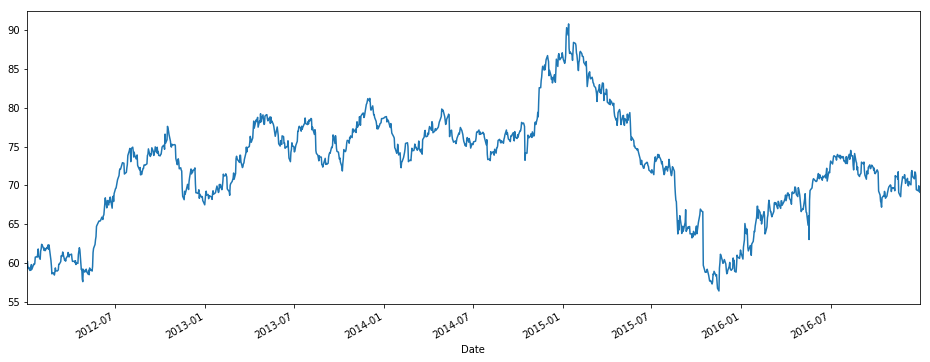

In [3]:
df['Open'].plot(figsize=(16,6))

In [5]:
df.rolling(7).mean().head(20)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-05,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-06,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-09,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-10,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-11,59.495714,59.895714,59.074285,59.440000,9.007414e+06,51.842984
2012-01-12,59.469999,59.744285,59.007143,59.321429,8.231357e+06,51.739567
2012-01-13,59.322857,59.638571,58.941428,59.297143,7.965071e+06,51.718386


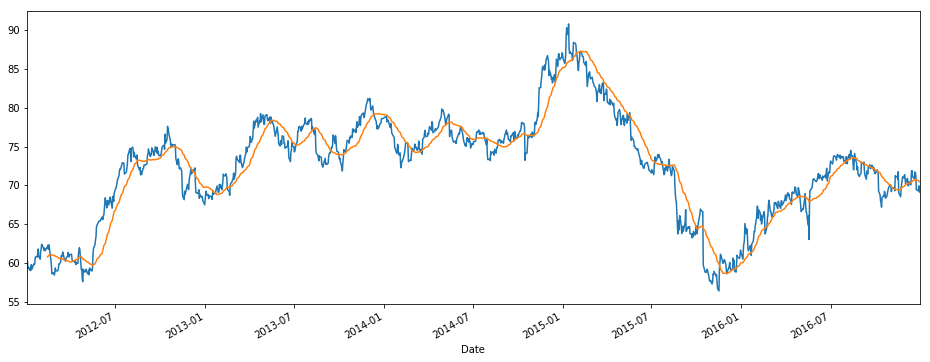

In [11]:
df['Open'].plot(figsize=(16,6))
df.rolling(window=30).mean()['Close'].plot(figsize=(16,6))

In [43]:
df['Closing 30 Day MA'] = df['Close'].rolling(window=30).mean()

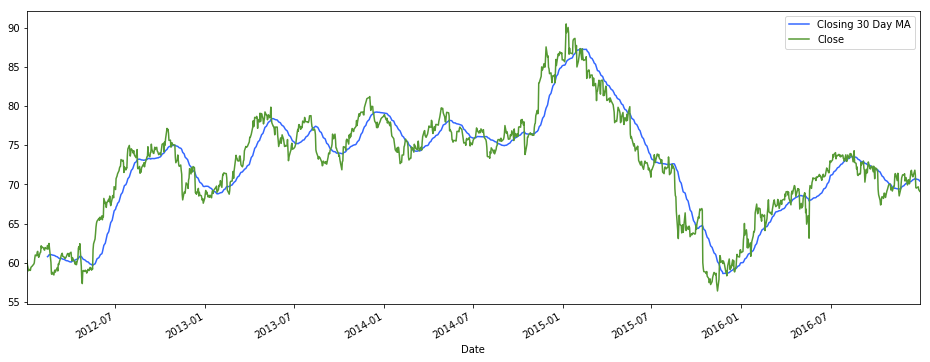

In [44]:
df[['Closing 30 Day MA', 'Close']].plot(color=['#3366FF','#559933'],figsize=(16,6))

In [ ]:
# Expanding method averages everything up to a point. So half way would be average up to half. (Average of 1st half data)
# The point at 25% would be the average of the 1st quarter of the data.
# The last data point would be the average of all the data points.

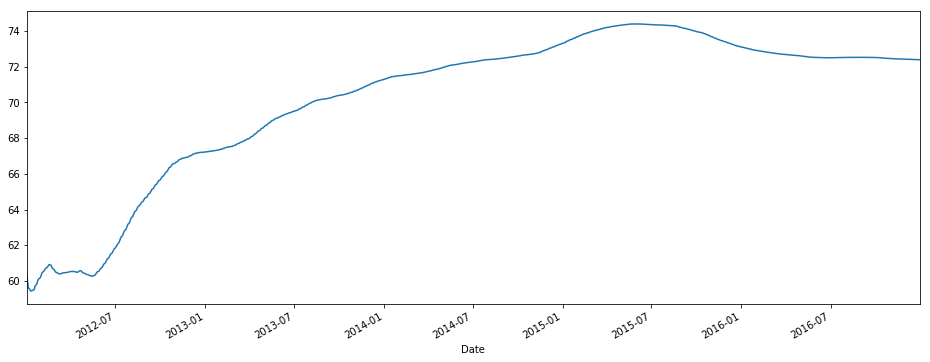

In [45]:
df['Close'].expanding().mean().plot(figsize=(16,6))

In [ ]:
# Bollinger Bands
# typically use a 20 rolling mean

# Columns we will need
#1) Closing 20 Day MA
#2) Upper = 20MA + 2*std(20MA (i.e rolling.std()))
#3) Lower = 20MA - 2*std(20MA (i.e rolling.std()))
#4) Close

In [46]:
#df = pd.read_csv('walmart_stock.csv', index_col='Date', parse_dates=True)
df['Closing 20 Day MA'] = df['Close'].rolling(window=20).mean()
df['Upper'] = df['Closing 20 Day MA'] + 2*(df['Close'].rolling(window=20).std())
df['Lower'] = df['Closing 20 Day MA'] - 2*(df['Close'].rolling(window=20).std())

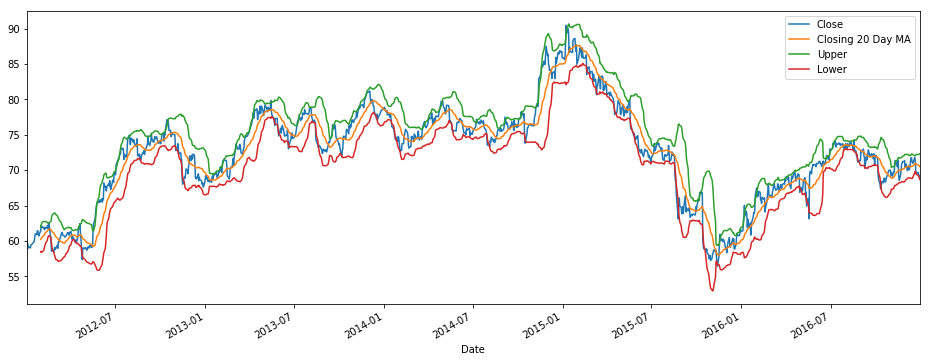

In [49]:
df[['Close','Closing 20 Day MA','Upper','Lower']].plot(figsize=(16,6))

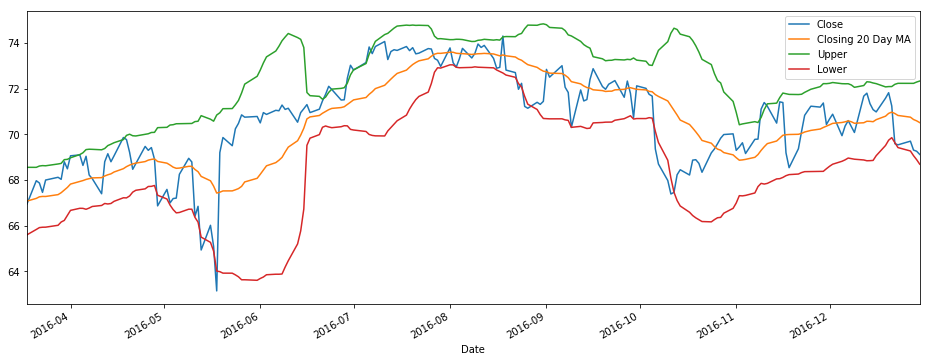

In [50]:
df[['Close','Closing 20 Day MA','Upper','Lower']].tail(200).plot(figsize=(16,6))